In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv("Loan.csv")
data.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

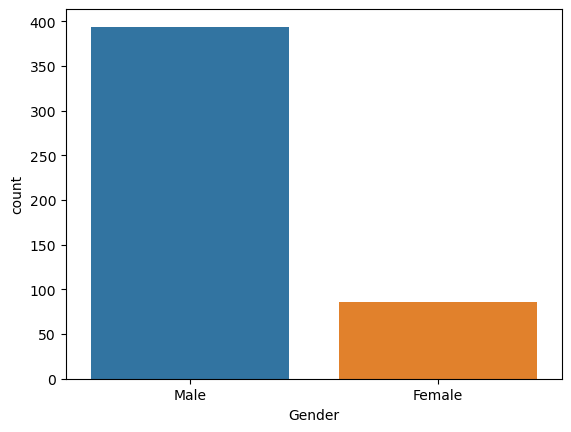

In [9]:
sns.countplot(data, x="Gender")
plt.show()

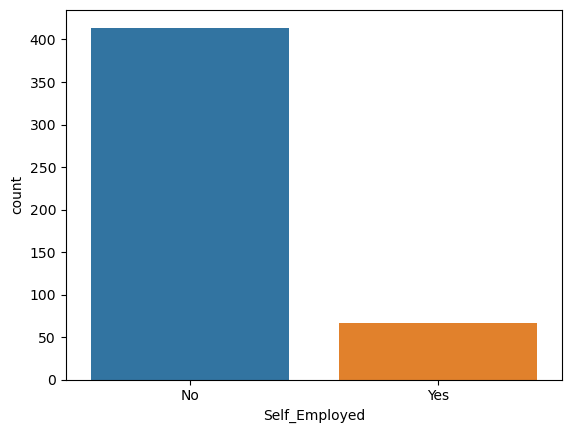

In [10]:
sns.countplot(data, x="Self_Employed")
plt.show()

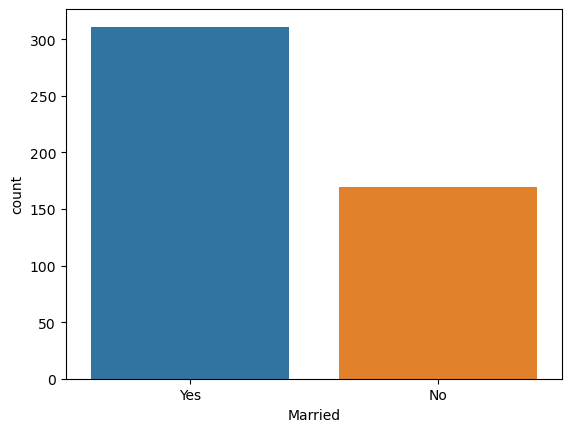

In [11]:
sns.countplot(data, x="Married")
plt.show()

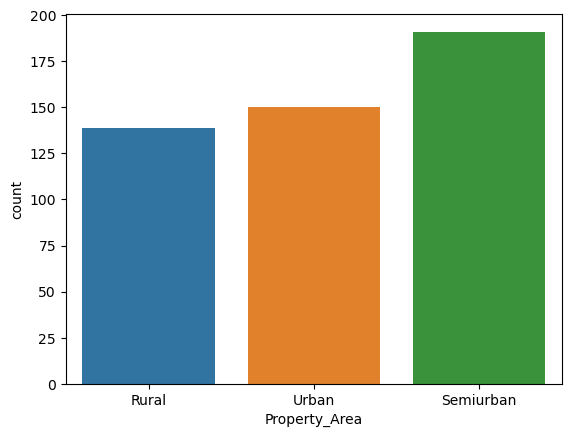

In [12]:
sns.countplot(data, x="Property_Area")
plt.show()

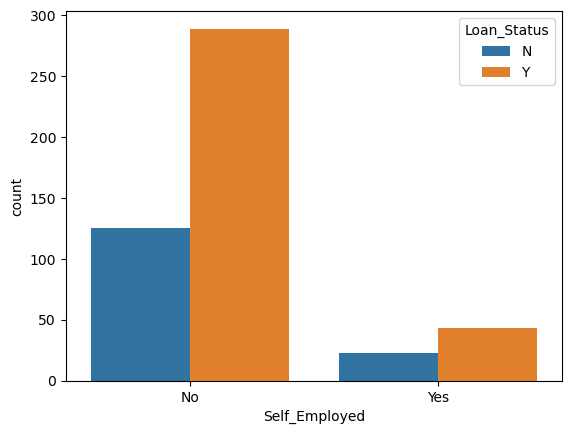

In [13]:
sns.countplot(data, x="Self_Employed",hue="Loan_Status")
plt.show()

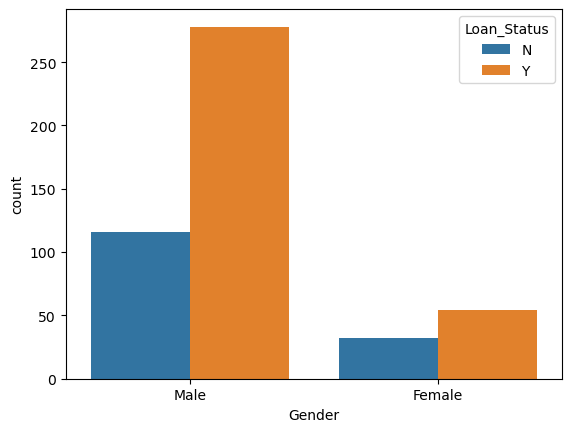

In [14]:
sns.countplot(data, x="Gender", hue="Loan_Status")
plt.show()

In [15]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [16]:
data.drop(columns="Loan_ID", axis=1, inplace=True)

In [17]:
# Replace Male -->1 and Female -->0
data.Gender.replace({"Male":1, "Female":0}, inplace=True)

data.Education.replace({"Graduate":1, "Not Graduate":0 }, inplace=True)

data.Married.replace({"Yes":1,  "No":0}, inplace=True)

data.Self_Employed.replace({"Yes":1,  "No":0}, inplace=True)

data.Property_Area.replace({"Rural": 0, "Urban": 1, "Semiurban":2 }, inplace=True)

data.Loan_Status.replace({"N":0, "Y":1}, inplace=True)


from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
data.Dependents= label.fit_transform(data.Dependents)
# df.Gender=label.fit_transform(df.Gender)


In [18]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [19]:
# Separate Features and Target
x= data.drop(columns="Loan_Status")
y=data.Loan_Status

In [20]:
# Train and test Data

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

In [21]:
# Model Selection and Fitting

model= SVC(kernel="linear")

# Train the classifier on the training data
model.fit(x_train , y_train)

SVC(kernel='linear')

In [25]:
# prediction and Find Accuracy_Score
y_pred = model.predict(x_test)

acc=accuracy_score(y_pred, y_test)*100
print(f"The Accuracy Score of Loan Prediction: {acc}% ")

The Accuracy Score of Loan Prediction: 71.875% 
